# Sales Analysis

import Libraies


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Task 1: Merging 12 months of data into a single CSV file 

In [2]:
#read in all CSVs to one variable
files = [file for file in os.listdir('./Sales_Data')]

#create an empty data frame to store final merged files
all_months_data = pd.DataFrame()

#merge files
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read in new CSV with merged files

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


#### clean up data

In [4]:
# drop NaN rows
# get and store all nan
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

#delete nan
all_data = all_data.dropna(how='all')
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


#### Find 'Or' and delete it

In [12]:
# find the value 'Or' from Order date as it causes an error
or_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
or_df

# filter all_data to not take 'Or' rows from 'Order Date' column
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the right types


In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # convert to int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # convert to float

### Task 2: Augment data with additiona columns

#### add month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


#### add sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


### add city column

In [32]:
# let use apply() from pandas
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} - ({get_state(x)})")

# or all_data['city'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + '- (' + get_state(x) + ')')


# or 
# all_data['column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])


# all_data = all_data.drop(columns='column')
# or
# all_data.drop(columns='column', implace=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta-(GA),Atlanta - (GA)
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle-(WA),Seattle - (WA)
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta-(GA),Atlanta - (GA)
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta-(GA),Atlanta - (GA)
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle-(WA),Seattle - (WA)


#### Queatio 1: What was the best month for sales? How much was earned that month?

In [9]:
# group by month
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


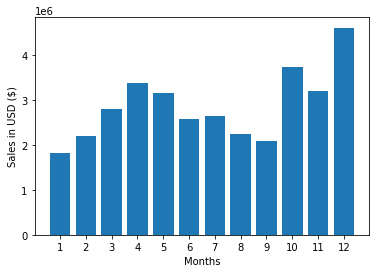

In [10]:
# visualise the results

months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()


#### Queation 2: What city had the highest number of sales?

In [33]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta - (GA),16602,2.779908e+06,104794,2.795499e+06
Austin - (TX),11153,1.809874e+06,69829,1.819582e+06
Boston - (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas - (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles - (CA),33289,5.421435e+06,208325,5.452571e+06
New York City - (NY),27932,4.635371e+06,175741,4.664317e+06
Portland - (ME),2750,4.471893e+05,17144,4.497583e+05
Portland - (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco - (CA),50239,8.211462e+06,315520,8.262204e+06


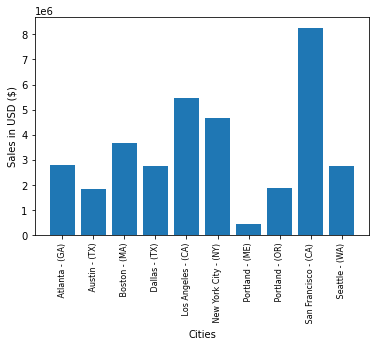

In [40]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

#### Question 3: what time should we display advertisements to maximize likehood of a customer's buying product?

In [49]:
# all_data.head()

# convert the order date column to a datetime object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,City
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta-(GA),Atlanta - (GA)
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle-(WA),Seattle - (WA)
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta-(GA),Atlanta - (GA)
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta-(GA),Atlanta - (GA)
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle-(WA),Seattle - (WA)


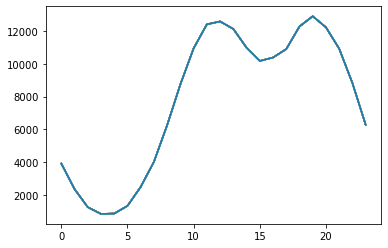

In [53]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute

hours = [hour for  hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())